# Spam Detection Project
- In this detection project,the aim is to develop model that can automatically identify and filter out spam content on the YouTube platform.  

This project prepared by Betul Ozkaldi.


## Libraries

In [1]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split, cross_val_score

In [3]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation as LDA

In [5]:
from yellowbrick.classifier import ConfusionMatrix

In [6]:
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
import spacy
import nltk 

In [4]:
#pip install yellowbrick --user

## Dataset

It is a public set of comments collected for spam research. It has five datasets composed by 1 and it has 1956 real messages extracted from videos that were among the 10 most viewed on the collection period.  
- https://archive.ics.uci.edu/dataset/380/youtube+spam+collection

In [7]:
df_eminem =pd.read_csv('C:/Users/btloz/JupyterNotes/module9/Eminem.csv')
df_kp =pd.read_csv('C:/Users/btloz/JupyterNotes/module9/KatyPerry.csv')
df_lmfao = pd.read_csv('C:/Users/btloz/JupyterNotes/module9/LMFAO.csv')
df_shakira = pd.read_csv('C:/Users/btloz/JupyterNotes/module9/Shakira.csv')
df_psy = pd.read_csv('C:/Users/btloz/JupyterNotes/module9/psy.csv')

In [8]:
df_eminem.head()

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,z12rwfnyyrbsefonb232i5ehdxzkjzjs2,Lisa Wellas,NaN,+447935454150 lovely girl talk to me xxx﻿,1
1,z130wpnwwnyuetxcn23xf5k5ynmkdpjrj04,jason graham,2015-05-29T02:26:10.652000,I always end up coming back to this song<br />﻿,0
2,z13vsfqirtavjvu0t22ezrgzyorwxhpf3,Ajkal Khan,NaN,"my sister just received over 6,500 new <a rel=...",1
3,z12wjzc4eprnvja4304cgbbizuved35wxcs,Dakota Taylor,2015-05-29T02:13:07.810000,Cool﻿,0
4,z13xjfr42z3uxdz2223gx5rrzs3dt5hna,Jihad Naser,NaN,Hello I&#39;am from Palastine﻿,1


In [10]:
#I checked the class labesl for target from documents 
df_eminem.CLASS.value_counts()

CLASS
1    245
0    203
Name: count, dtype: int64

**Spam : 1**  
**Ham  : 0**

## Concatenating Data

In [11]:
df =pd.concat([df_eminem, df_kp, df_lmfao, df_psy, df_shakira])
df

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,z12rwfnyyrbsefonb232i5ehdxzkjzjs2,Lisa Wellas,NaN,+447935454150 lovely girl talk to me xxx﻿,1
1,z130wpnwwnyuetxcn23xf5k5ynmkdpjrj04,jason graham,2015-05-29T02:26:10.652000,I always end up coming back to this song<br />﻿,0
2,z13vsfqirtavjvu0t22ezrgzyorwxhpf3,Ajkal Khan,NaN,"my sister just received over 6,500 new <a rel=...",1
3,z12wjzc4eprnvja4304cgbbizuved35wxcs,Dakota Taylor,2015-05-29T02:13:07.810000,Cool﻿,0
4,z13xjfr42z3uxdz2223gx5rrzs3dt5hna,Jihad Naser,NaN,Hello I&#39;am from Palastine﻿,1
...,...,...,...,...,...
365,_2viQ_Qnc6-bMSjqyL1NKj57ROicCSJV5SwTrw-RFFA,Katie Mettam,2013-07-13T13:27:39.441000,I love this song because we sing it at Camp al...,0
366,_2viQ_Qnc6-pY-1yR6K2FhmC5i48-WuNx5CumlHLDAI,Sabina Pearson-Smith,2013-07-13T13:14:30.021000,I love this song for two reasons: 1.it is abou...,0
367,_2viQ_Qnc6_k_n_Bse9zVhJP8tJReZpo8uM2uZfnzDs,jeffrey jules,2013-07-13T12:09:31.188000,wow,0
368,_2viQ_Qnc6_yBt8UGMWyg3vh0PulTqcqyQtdE7d4Fl0,Aishlin Maciel,2013-07-13T11:17:52.308000,Shakira u are so wiredo,0


In [12]:
df.shape

(1956, 5)

## Splitting the Data

In [13]:
# input data
X= df['CONTENT'].values 
y =df['CLASS'].values

In [14]:
X #array of messages

array(['+447935454150 lovely girl talk to me xxx\ufeff',
       'I always end up coming back to this song<br />\ufeff',
       'my sister just received over 6,500 new <a rel="nofollow" class="ot-hashtag" href="https://plus.google.com/s/%23active">#active</a> youtube views Right now. The only thing she used was pimpmyviews. com\ufeff',
       ..., 'wow', 'Shakira u are so wiredo',
       'Shakira is the best dancer'], dtype=object)

In [15]:
X.shape

(1956,)

In [16]:
X_train, X_test, y_train,y_test = train_test_split(X,y, random_state =0)
X_train.shape, X_test.shape

((1467,), (489,))

# Feature Extraction
##  Bag of Words  
- The "Bag of Words" (BoW) is a common technique in natural language processing (NLP) for feature extraction from text data. It's a simple and effective way to represent text documents for machine learning and text analysis.

In [17]:
vect = CountVectorizer().fit(X_train)
X_train_bag =vect.transform(X_train)
X_test_bag  = vect.transform(X_test)

In [20]:
X_train_bag.shape #It was one column and after Countvectorizer we obtained 3733 columns

(1467, 3733)

In [31]:
X.shape

(1956,)

In [22]:
# we can check the vocablaries
vect.get_feature_names_out()

array(['00', '000', '02', ..., 'ｔｈｉｓ', 'ｕｓｒ', 'ｗｗｗ'], dtype=object)

### **XGBoost**

In [27]:
xgb =XGBClassifier()

scores =cross_val_score(xgb, X_train_bag, y_train, cv=5)
scores

array([0.93197279, 0.94557823, 0.94197952, 0.94539249, 0.94880546])

In [25]:
scores.mean()

0.9427456989621789

- It looks model perform very well let's see Confusion Matrix

### Confusion Matrix

In [30]:
sum(y_train)

750

Text(0.5, 1.0, 'Confusion Matrix of Test Set')

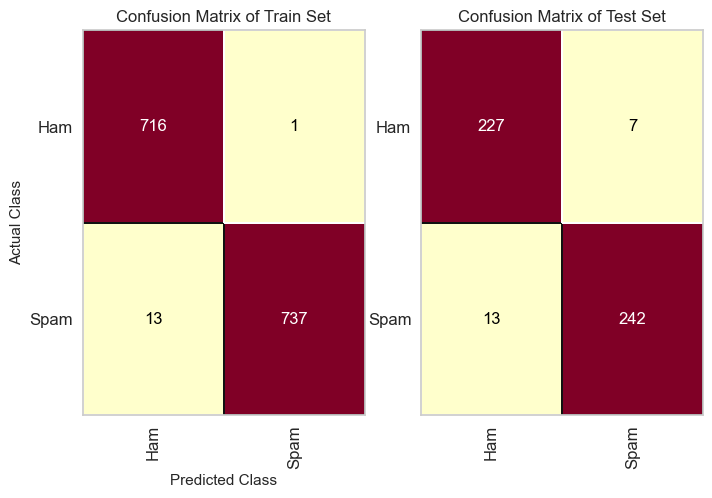

In [57]:
plt.figure(figsize= (8,5))
plt.subplot(1,2,1)
plt.title('Confusion Matrix of Train Set')
xgb =XGBClassifier()
xgb.fit(X_train_bag,y_train)
cm =ConfusionMatrix(xgb, classes=['Ham','Spam'])
cm.fit(X_train_bag, y_train)
cm.score(X_train_bag,y_train)
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')

plt.subplot(1,2,2)
xgb.fit(X_train_bag,y_train)
cm =ConfusionMatrix(xgb, classes=['Ham','Spam'])
cm.fit(X_test_bag, y_test)
cm.score(X_test_bag,y_test)
plt.title('Confusion Matrix of Test Set')

In [29]:
cm.score(X_test_bag, y_test)

0.9591002044989775

### **Logistic Regression**

In [42]:
log_reg =LogisticRegression(max_iter=1000)
score =cross_val_score(log_reg,X_train_bag, y_train)
score

array([0.92176871, 0.95238095, 0.92832765, 0.95221843, 0.96245734])

In [43]:
score.mean()

0.9434306145666456

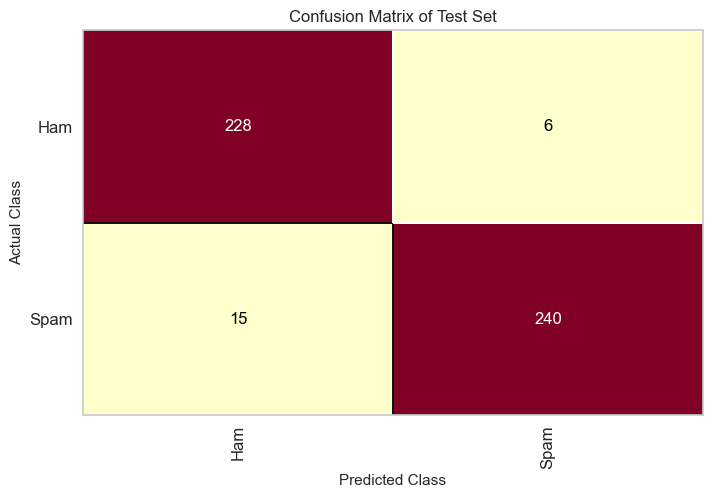

In [53]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
log_reg.fit(X_train_bag,y_train)
cm =ConfusionMatrix(log_reg, classes=['Ham','Spam'])
cm.fit(X_test_bag, y_test)
cm.score(X_test_bag,y_test)
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.title('Confusion Matrix of Test Set');

## Stopwords  
-  Let's remove thee Stopwords from text data during preprocessing to reduce dimensionality and improve the efficiency and quality of text analysis. 

In [58]:
vect = CountVectorizer(stop_words='english').fit(X_train)
X_train_bag =vect.transform(X_train)
X_test_bag  = vect.transform(X_test)

In [59]:
X_train_bag.shape

(1467, 3512)

- It was 3733 we removed 221 words

In [60]:
vect.get_feature_names_out()

array(['00', '000', '02', ..., 'ｔｈｉｓ', 'ｕｓｒ', 'ｗｗｗ'], dtype=object)

### XGBoost

In [62]:
xgb =XGBClassifier()
scores =cross_val_score(xgb, X_train_bag, y_train, cv=5)

In [63]:
scores

array([0.91836735, 0.95238095, 0.93856655, 0.93174061, 0.93515358])

In [64]:
scores.mean()

0.935241810034594

## min_df

In [65]:
vect = CountVectorizer(min_df=10).fit(X_train) # word should be in at least in 10 documents
X_train_bag =vect.transform(X_train)
X_test_bag  = vect.transform(X_test)

In [67]:
X_train_bag.shape #effect is so much we have now 304 columns

(1467, 304)

### XGBoost

In [68]:
xgb =XGBClassifier()
scores =cross_val_score(xgb, X_train_bag, y_train, cv=5)
scores

array([0.92517007, 0.93197279, 0.94539249, 0.94539249, 0.94880546])

In [70]:
scores.mean()

0.9393466601657728

- Despite significantly reducing our vocabulary, we observed that the results remained consistent.   
This indicates that essential words are still retained within the model. In other words, the model successfully filtered out less important words, showcasing the effectiveness of the 'min_df' parameter." 


## max_df  
- max number of doc

In [72]:
vect = CountVectorizer(max_df=0.01).fit(X_train)
X_train_bag =vect.transform(X_train) # not too much differences for feature numbers it means there is no comman words
X_test_bag  = vect.transform(X_test) 

In [73]:
X_train_bag.shape #effect is so much

(1467, 3513)

- I played with the max_df parameter it seems there are not common words a lot.

### XGBoost 

In [74]:
xgb =XGBClassifier()
scores =cross_val_score(xgb, X_train_bag, y_train, cv=5)
scores

array([0.63605442, 0.67006803, 0.63481229, 0.65187713, 0.61774744])

In [75]:
scores.mean()

0.6421118618095704

- We removed the common words and it effected the result in a negative way a lot.Because it removed the important words. So in this project we can observe the affect of min_df and max df.

# TF-IDF   
- (Term Frequency-Inverse Document Frequency)  
TF-IDF is a numerical statistic that reflects the importance of a word or term within a collection of documents or a corpus.  
_TF(t, d)_ = (Number of times term t appears in document d) / (Total number of terms in document d)  
_IDF(t)_ = log((Total number of documents) / (Number of documents containing term t))  
**TF-IDF**=  TF x IDF

In [76]:
tfidf = TfidfVectorizer(min_df=10).fit(X_train)
X_train_tfidf =tfidf.transform(X_train)
X_test_tfidf  = tfidf.transform(X_test) 

In [77]:
X_train_tfidf.shape 

(1467, 304)

### XGBoost

In [78]:
xgb =XGBClassifier()
scores =cross_val_score(xgb, X_train_tfidf, y_train, cv=5)
scores

array([0.94217687, 0.93197279, 0.92491468, 0.95904437, 0.93174061])

In [80]:
scores.mean()

0.9379698637134035

# Feature importance  
- Let's check the important features

In [81]:
vect = CountVectorizer(min_df=10).fit(X_train)
X_train_bag =vect.transform(X_train)
X_test_bag  = vect.transform(X_test)

In [82]:
xgb =XGBClassifier()
xgb.fit(X_train_bag,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [83]:
X_train_bag.shape

(1467, 304)

In [84]:
f_imp = xgb.feature_importances_ # we have 304 features and each feature has importance

In [95]:
f_names= vect.get_feature_names_out()
f_names.shape

(304,)

In [96]:
f_names

array(['000', '100', '15', '2014', '2015', '39', 'about', 'ago', 'all',
       'also', 'am', 'amp', 'an', 'and', 'any', 'anyone', 'appreciate',
       'are', 'as', 'at', 'awesome', 'back', 'be', 'beautiful', 'because',
       'been', 'before', 'being', 'best', 'better', 'billion', 'boy',
       'br', 'but', 'by', 'called', 'can', 'chance', 'channel', 'check',
       'click', 'co', 'com', 'come', 'comment', 'comments', 'cool',
       'could', 'cover', 'covers', 'crazy', 'dance', 'day', 'did', 'do',
       'does', 'doing', 'don', 'dont', 'dream', 'earth', 'eminem',
       'enjoy', 'even', 'ever', 'every', 'everyday', 'everyone',
       'extraordinary', 'facebook', 'fans', 'feel', 'few', 'first',
       'follow', 'for', 'fox', 'free', 'from', 'fuck', 'fucking', 'funny',
       'gangnam', 'get', 'gets', 'getting', 'girl', 'give', 'go', 'god',
       'good', 'google', 'got', 'great', 'gt', 'guy', 'guys', 'has',
       'hate', 'have', 'he', 'hear', 'heard', 'hello', 'help', 'her',
       'he

In [88]:
np.argsort(f_imp)[-20:] # this is index, checking the first most important 20 

array([ 87,  60, 115, 117, 253, 154, 160, 104, 270,  44,  74, 235, 214,
       191,  39, 295,  38, 234,  42, 180], dtype=int64)

In [90]:
sorted_features =f_names[np.argsort(f_imp)]
sorted_features

array(['megan', 'lyrics', 'made', 'time', 'making', 'man', 'many',
       'maybe', 'tiger', 'mean', 'youtu', 'lt', 'moment', 'month', 'most',
       'much', 'these', 'name', 'need', 'never', 'nice', 'no', 'then',
       'those', 'today', 'lot', 'lol', 'his', 'home', 'hope', 'start',
       've', 'id', 'us', 'im', 'type', 'trying', 'true', 'keep', 'know',
       'leave', 'lie', 'life', 'too', 'likes', 'link', 'listen', 'little',
       'live', 'll', 'nothing', 'now', 'off', 'old', 'regret', 'right',
       'rihanna', 'roar', 'support', 'same', 'such', 'sexy', 'sub',
       'style', 'she', 'shit', 'should', 'simple', 'singer', 'stop',
       'some', 'someone', 'still', 'songs', 'soon', 'sorry', 'spam',
       'ref', 'hi', 'than', 'reading', 'omg', 'them', 'online', 'their',
       'our', 'over', 'page', 'part', 'party', 'per', 'person', 'play',
       'playlist', 'thanks', 'plus', 'probably', 'thank', 'quot', 'rap',
       'rapper', 're', 'reach', 'read', 'real', 'hey', 'very', 'do',
   

In [91]:
f_imp[151], f_imp[180] #the less importance and the most importance 

(0.0, 0.18223855)

In [93]:
sorted_importance =f_imp[f_imp.argsort()]

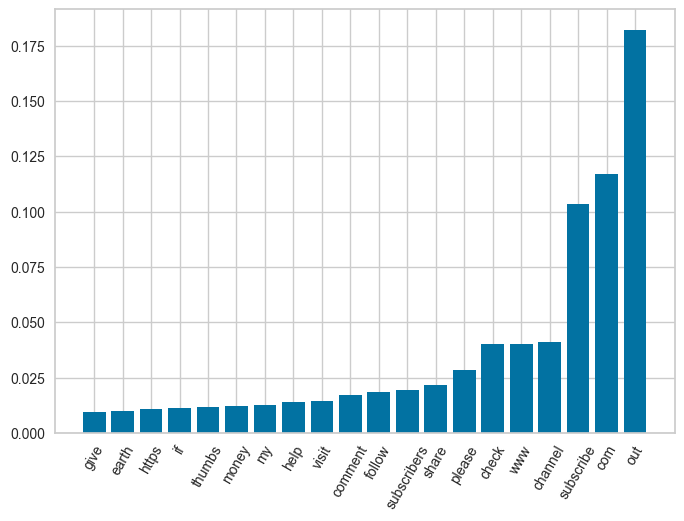

In [94]:
N= 20
plt.xticks(rotation=60)
plt.bar(sorted_features[-N:],sorted_importance[-N:]);

# N_grams  
- n_grams makes more consecutive words. In that way we are increasing the features.

In [97]:
vect = CountVectorizer(ngram_range =(1,4), min_df=5).fit(X_train)
X_train_bag =vect.transform(X_train) 
X_test_bag  = vect.transform(X_test) 

In [98]:
X_train_bag.shape 

(1467, 1883)

## XGBoost

In [99]:
xgb =XGBClassifier()

scores =cross_val_score(xgb, X_train_bag, y_train, cv=5)
scores

array([0.92176871, 0.94217687, 0.93856655, 0.94539249, 0.94197952])

In [100]:
scores.mean()

0.9379768289568388

# Lemmatization    
- Lemmatization is a text normalization technique that reduces words to their base or dictionary form. 

In [101]:
import spacy

In [102]:
npl = spacy.load('en_core_web_sm')

In [103]:
def lemma_tokenizer(text):
    return [token.lemma_ for token in nlp(text)]

In [106]:
vect = CountVectorizer(tokenizer =lemma_tokenizer).fit(X_train)
X_train_lemma =vect.transform(X_train) 
X_test_lemma  = vect.transform(X_test) 

In [107]:
X_train_lemma.shape

(1467, 3843)

## XGBoost

In [108]:
xgb =XGBClassifier()

scores =cross_val_score(xgb, X_train_lemma, y_train, cv=5)
scores

array([0.86734694, 0.87414966, 0.86348123, 0.92150171, 0.9112628 ])

In [109]:
scores.mean()

0.8875484664855703

- Lemmatization did not help the improve our score.

# Stemming  
- Stemming is another text normalization technique that reduces words to their root form
- It checks suffixes. Need to import nltk (natural language took kit)

In [110]:
stemmer = nltk.stem.PorterStemmer()

In [111]:
def stem_tokenizer(text):
    return [stemmer.stem(token.norm_.lower()) for token in nlp(text)]

In [113]:
vect = CountVectorizer(tokenizer =stem_tokenizer).fit(X_train)
X_train_stem = vect.transform(X_train) 
X_test_stem  = vect.transform(X_test) 

In [114]:
X_train_stem.shape

(1467, 3760)

## XGBoost

In [115]:
xgb =XGBClassifier()

scores =cross_val_score(xgb, X_train_stem, y_train, cv=5)
scores

array([0.86054422, 0.86734694, 0.84300341, 0.9112628 , 0.91467577])

In [116]:
scores.mean()

0.8793666271969538

# LDA  
- Latent Dirichlet Allocation   
- It can be valuable for identifying topics in text data, which can help in spam detection.
- Topic extraction

In [117]:
from sklearn.decomposition import LatentDirichletAllocation as LDA

In [118]:
vect = CountVectorizer(min_df=10).fit(X_train) #this part is data
X_train_bag =vect.transform(X_train) 
X_test_bag = vect.transform(X_test) 

In [121]:
X_train_bag.shape

(1467, 304)

In [122]:
lda =LDA(n_components =10, random_state = 0)

In [123]:
X_lda = lda.fit_transform(X_train_bag)

- These are going to be the new coordinate in the new bases which are the components
- We choose 10 components it means there will be 10 topics.

In [124]:
topics =lda.components_
topics.shape

(10, 304)

- It is going to be 10*304. Because each topic is a linear combination of the words. We have 304 words 10 components


- Let's check most commonly used words for each topics

In [125]:
f_names= vect.get_feature_names_out()
f_names

array(['000', '100', '15', '2014', '2015', '39', 'about', 'ago', 'all',
       'also', 'am', 'amp', 'an', 'and', 'any', 'anyone', 'appreciate',
       'are', 'as', 'at', 'awesome', 'back', 'be', 'beautiful', 'because',
       'been', 'before', 'being', 'best', 'better', 'billion', 'boy',
       'br', 'but', 'by', 'called', 'can', 'chance', 'channel', 'check',
       'click', 'co', 'com', 'come', 'comment', 'comments', 'cool',
       'could', 'cover', 'covers', 'crazy', 'dance', 'day', 'did', 'do',
       'does', 'doing', 'don', 'dont', 'dream', 'earth', 'eminem',
       'enjoy', 'even', 'ever', 'every', 'everyday', 'everyone',
       'extraordinary', 'facebook', 'fans', 'feel', 'few', 'first',
       'follow', 'for', 'fox', 'free', 'from', 'fuck', 'fucking', 'funny',
       'gangnam', 'get', 'gets', 'getting', 'girl', 'give', 'go', 'god',
       'good', 'google', 'got', 'great', 'gt', 'guy', 'guys', 'has',
       'hate', 'have', 'he', 'hear', 'heard', 'hello', 'help', 'her',
       'he

In [126]:
sorted_top = np.argsort(topics)
sorted_top

array([[ 68, 227, 168, ...,  13, 243, 299],
       [ 68, 110, 218, ..., 243, 251, 223],
       [ 68,  72, 227, ..., 262, 121,  32],
       ...,
       [ 68, 102, 153, ..., 242, 215, 120],
       [ 68, 168, 218, ..., 256, 299, 234],
       [102, 168, 153, ..., 295, 243,  42]], dtype=int64)

## Importance  
- We'll highlight the importance of LDA in uncovering underlying themes and topics in text data and its relevance to spam detection.

In [127]:
#important words in each topic
for i in range(10):
    sorted_top = np.argsort(topics[i])
    print(f'Topic-{i}: {f_names[sorted_top[-8:]]}')

Topic-0: ['your' 'of' 'for' 'to' 'katy' 'and' 'the' 'you']
Topic-1: ['like' 'best' 'in' 'is' 'love' 'the' 'this' 'song']
Topic-2: ['gt' 'million' 'like' 'share' 'rihanna' 'up' 'it' 'br']
Topic-3: ['thanks' 'please' 'quot' 'channel' 'new' 'my' 'check' 'out']
Topic-4: ['playlist' 'amp' 'check' 'out' 'video' 'this' 'youtube' 'on']
Topic-5: ['we' 'be' 'views' 'and' 'just' 'of' 'the' 'to']
Topic-6: ['so' 'it' 'the' 'my' '39' 'to' 'and' 'you']
Topic-7: ['beautiful' 'music' 'this' 'her' 'are' 'that' 'she' 'is']
Topic-8: ['it' 'if' 'and' 'me' 'my' 'to' 'you' 'subscribe']
Topic-9: ['you' 'amp' 'and' 'https' 'http' 'www' 'the' 'com']


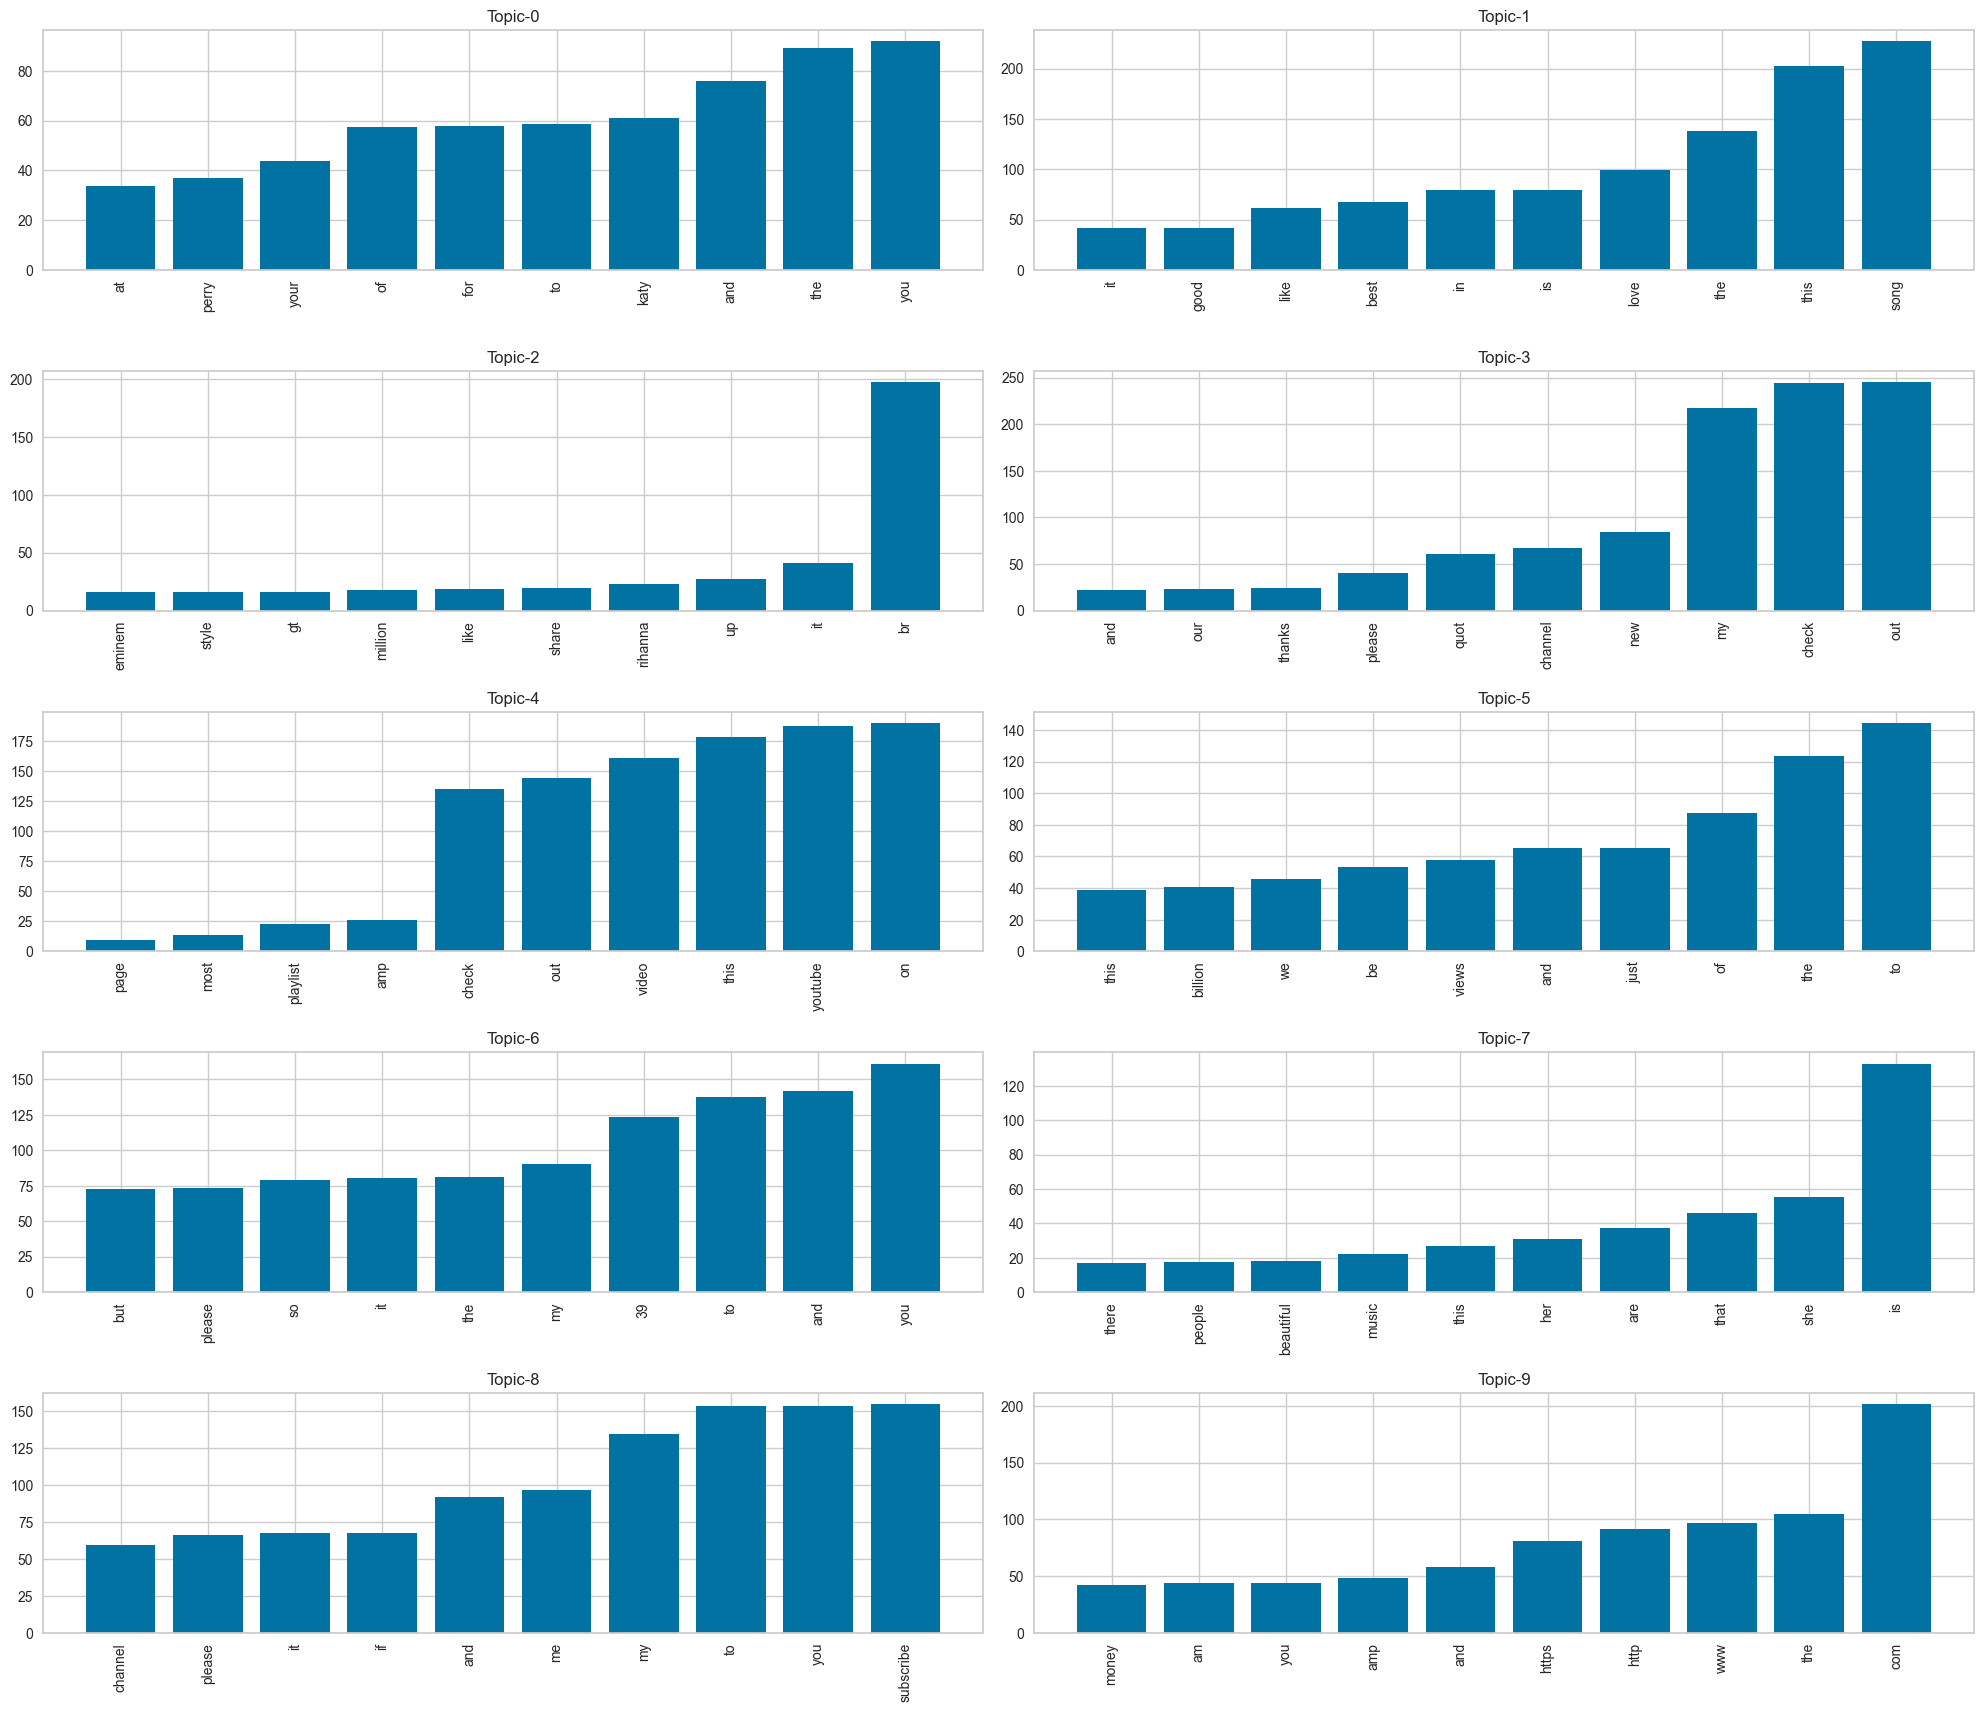

In [136]:
plt.figure(figsize=(20,20))
for i in range (10):
    plt.subplot(6,2,i+1)
    plt.title(f'Topic-{i}')
    sorted_top = np.argsort(topics[i])
    plt.bar(f_names[sorted_top[-10:]], topics[i][sorted_top[-10:]])
    plt.xticks(rotation=90)
plt.tight_layout()  
plt.show()

# Conclusion

- In this spam detection project, I applied various methods for analysis. During the feature extraction phase, I experimented with both reducing and increasing the number of features to observe their impact on accuracy. Notably, the results were consistently close when using the XGBoost Classifier, and our test score reached an impressive 0.9352. Furthermore, I assessed accuracy using a confusion matrix, and the results were very promising.
 However, when I applied lemmatization and stemming techniques and I noticed that the score deteriorated.  
 

- In the Latent Dirichlet Allocation (LDA) analysis, I examined feature importance and aimed to gain insights. It was evident that the most important features aligned well with their respective topics. Let's attempt to establish a connection between the most significant words and these topics:"

**Topic-0** appears to be related to discussions about "Katy" (Katy Perry) and could be associated with comments that include personal pronouns, prepositions, and general words like "and" and "the." It may not represent a specific theme

**Topic-1** seems to be related to discussions about music and songs. It includes words like "like," "best," "love," and "song," which are common in discussions about music preferences and opinions.

**Topic-2** appears to involve discussions related to numbers, metrics, and possibly references to Rihanna. Words like "million," "share," and "up" may be related to views and engagement with content.

**Topic-3** seems to be related to interactions with YouTube channels. It includes words like "thanks," "please," "channel," "check," and "out," which are commonly used when promoting or discussing YouTube channels and videos.

**Topic-4** appears to be related to playlist creation and sharing on YouTube. It includes words like "playlist," "video," "YouTube," and "check," which are often used when organizing and sharing video content.

**Topic-5**  might be related to general discussions about views and engagement. Words like "we," "be," "views," "and," and "just" are common in discussions about video performance.

**Topic-6** may not have a clear theme based on the words provided. It includes common words like "so," "it," "the," "my," and "you," which are not specific to a particular topic.

**Topic-7** is related to discussions about music and may involve comments about the beauty and quality of music. It includes words like "beautiful," "music," "she," and "is."

**Topic-8** is likely related to calls to action and engagement on YouTube. It includes words like "subscribe," "me," "you," and "it," which are often used to encourage user actions.

**Topic-9** may involve comments related to external links, websites, and general interactions. Words like "https," "www," and "com" suggest references to URLs or web content.